## Data Clustering
In this assignment, we will use a new dataset (https://www.kaggle.com/shwetabh123/mall-customers), which is about customers of a mall, and perform data clutering. We will use silhouette score to evaluate the result. 


1. First, load the data from Mall_Customers.csv. The file is in the same folder of the lab. 

In [2]:
!pip install kagglehub==0.3.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 kB 8.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shwetabh123/mall-customers")

print("Path to dataset files:", path)

/shared-libs/python3.9/py/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 1.56k/1.56k [00:00<00:00, 735kB/s]Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/shwetabh123/mall-customers/versions/1



2. Display the data. There are 200 records and five columns, including CustomerID, Gender, Age, Annual Income, and Spending Score. 

In [4]:
import pandas as pd

# Load the dataset
data_path = "/root/.cache/kagglehub/datasets/shwetabh123/mall-customers/versions/1/Mall_Customers.csv"
data = pd.read_csv(data_path)

# Display the first few rows
print(data.head())


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


3. Drop CusotmerID as it is irrelvant to a customer's features.

4. Use labelEncoder to convert Gender values to numerical ones. 

In [7]:
from sklearn.preprocessing import LabelEncoder

# Drop CustomerID column
# data = data.drop(columns=["CustomerID"])

# Convert Gender column to numeric using LabelEncoder
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Genre'])

# Display the modified data
print(data.head())


    Genre  Age  Annual Income (k$)  Spending Score (1-100)  Gender
0    Male   19                  15                      39       1
1    Male   21                  15                      81       1
2  Female   20                  16                       6       0
3  Female   23                  16                      77       0
4  Female   31                  17                      40       0


5. Now it is ready to do the clustering. First, use all the left 4 attributes as the features. Then use the code in the demo to generate the line graph and follow the elbow method to identify the optimal K. 



```
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertia_values = []
for i in range(1, 11):
  km = KMeans(n_clusters=i)
  km.fit_predict(features) # here, features include all the attributes used for clustering
  inertia_values.append(km.inertia_)
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1, 11), inertia_values, color='red')
plt.xlabel('No. of Clusters', fontsize=15)
plt.ylabel('SSE / Inertia', fontsize=15)
plt.title('SSE / Inertia vs No. Of Clusters', fontsize=15)
plt.grid()
plt.show()
```



In [8]:
# Select features for clustering
features = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


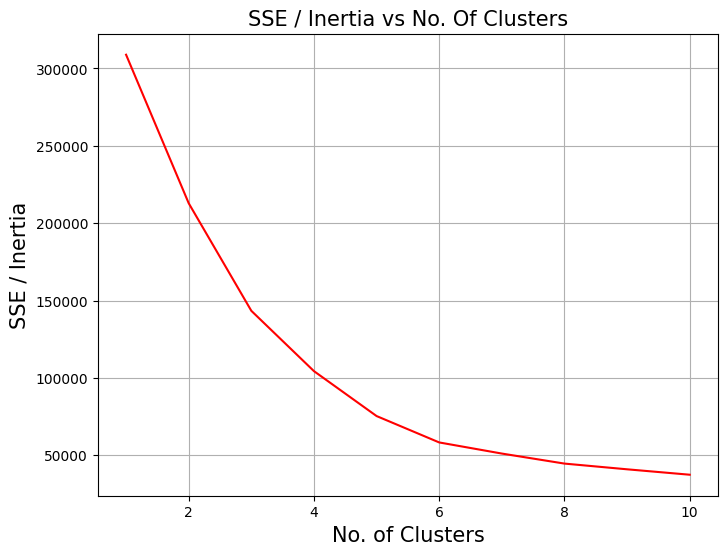

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertia_values = []
for i in range(1, 11):
  km = KMeans(n_clusters=i)
  km.fit_predict(features) # here, features include all the attributes used for clustering
  inertia_values.append(km.inertia_)
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1, 11), inertia_values, color='red')
plt.xlabel('No. of Clusters', fontsize=15)
plt.ylabel('SSE / Inertia', fontsize=15)
plt.title('SSE / Inertia vs No. Of Clusters', fontsize=15)
plt.grid()
plt.show()

6. So it seems that K=6 is the optimal number. Generate the kmeans clustering result where K=6. Print km.labels_ and explain what the result means. 

In [14]:
# Perform KMeans clustering with K=6
kmeans = KMeans(n_clusters=6)
data['Cluster'] = kmeans.fit_predict(features)

# Print the labels for each record
print("Cluster Labels:\n", kmeans.labels_)


Cluster Labels:
 [4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4
 5 4 5 0 5 0 3 4 5 0 3 3 3 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 1 3 1 2 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 3 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


7. Print the silhouette score of this clustering result. 

In [15]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
sil_score = silhouette_score(features, kmeans.labels_)
print("Silhouette Score for K=6:", sil_score)


Silhouette Score for K=6: 0.45205475380756527


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cf886d58-b5c5-494f-83a3-52efa87a4945' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>